In [1]:

import pandas as pd
import geopandas as gpd
import numpy as np

data=pd.read_html("https://www.statista.com/statistics/1103458/india-novel-coronavirus-covid-19-cases-by-state/")[0]
data.rename(columns = {'Unnamed: 0':'STATE'}, inplace = True)
ind_data=gpd.read_file(r'C:\Users\PC\Desktop\ind shape file\IND_adm1.shp')
sum=0
total=list()
for i in range (len(data)):
    sum=sum+data['Confirmed'][i]+data['Recovered'][i]+data['Deceased'][i]
    total.append(sum)
    sum=0
data['Total']=total
data.drop(data.index[[24]],inplace = True)
data.sort_values('STATE', inplace = True)
print(data)

                          STATE  Confirmed  Recovered  Deceased  Total
25  Andaman and Nicobar islands         33         33         0     66
8                Andhra Pradesh       2407       1456        50   3913
30            Arunachal Pradesh          1          1         0      2
20                        Assam        101         41         2    144
11                        Bihar       1262        475         8   1745
18                   Chandigarh        191         51         3    245
22                 Chhattisgarh         86         59         0    145
32       Dadra and Nagar Haveli          1          0         0      1
3                         Delhi      10054       4485       160  14699
26                          Goa         29          7         0     36
1                       Gujarat      11379       4499       659  16537
14                      Haryana        910        562        14   1486
23             Himachal Pradesh         80         44         3    127
12    

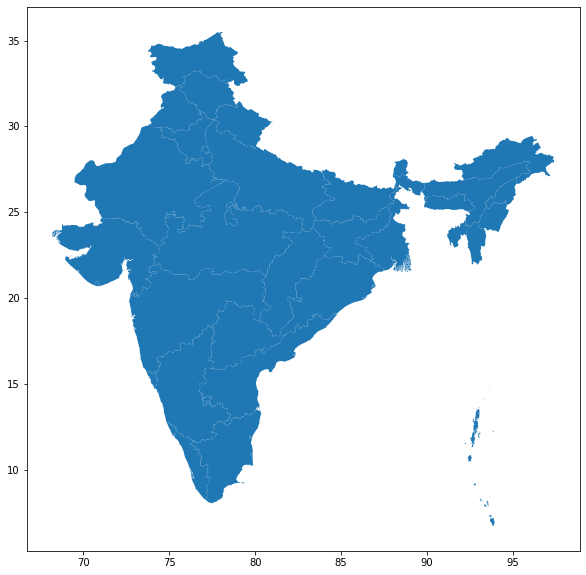

In [2]:
ind_data.plot(figsize = (10,10))

In [3]:
ind_data.replace("Uttaranchal","Uttarakhand",inplace=True)
ind_data.replace("Orissa","Odisha",inplace=True)
ind_data.drop(ind_data.index[[8,18,24,29]],inplace = True)
ind_data.reset_index(inplace=True)
print(ind_data)

    index  ID_0  ISO NAME_0  ID_1                  NAME_1          TYPE_1  \
0       0   105  IND  India     1     Andaman and Nicobar  Union Territor   
1       1   105  IND  India     2          Andhra Pradesh           State   
2       2   105  IND  India     3       Arunachal Pradesh           State   
3       3   105  IND  India     4                   Assam           State   
4       4   105  IND  India     5                   Bihar           State   
5       5   105  IND  India     6              Chandigarh  Union Territor   
6       6   105  IND  India     7            Chhattisgarh           State   
7       7   105  IND  India     8  Dadra and Nagar Haveli  Union Territor   
8       9   105  IND  India    10                   Delhi  Union Territor   
9      10   105  IND  India    11                     Goa           State   
10     11   105  IND  India    12                 Gujarat           State   
11     12   105  IND  India    13                 Haryana           State   

In [6]:
ind_data['Recovered'] = data['Recovered']
ind = ind_data[['NAME_1','geometry','Recovered']]
ind.to_file(r'C:\Users\PC\Desktop\ind\ind.shp')